# preprocessing data 

In [1]:
import os 
import tensorflow as tf
import matplotlib.pyplot as plt 


In [235]:
def preprocess(file_path):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_image(img)
    
    # img = tf.image.resize(img, (100,100))
    # # Scale image to be between 0 and 1 
    # img = img / 255.0

    return img

In [223]:
def keypress_preprocess(file_path):
    
    keypress = tf.io.read_file(file_path)
    
    # return keypress [W,A,S,D,Space] 
                    # [up,left,down,right]
        
    # one-hot encoding
    if keypress == b'Key.left\r\n': 
        return [0,1,0,0]
    if keypress == b'Key.up\r\n': 
        return [1,0,0,0]
    if keypress == b'Key.down\r\n': 
        return [0,0,1,0]
    if keypress == b'Key.right\r\n': 
        return [0,0,0,1]
    else: 
        return [0,0,0,0]
    return keypress


In [217]:
# def keypress_preprocess_test(file_path):
    
#     keypress = tf.io.read_file(file_path)
    
#     return keypress


In [206]:
def wrap_array(x1,x2,x3,x4): 
    return tf.expand_dims([x1,x2,x3,x4], axis=0)


In [207]:
img = preprocess("data/48304052-2948-11ed-b780-88d7f63cfd20.png")

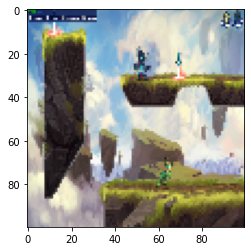

In [208]:
plt.imshow(img)

In [236]:
images = tf.data.Dataset.list_files(os.path.join("data", "*.png"), shuffle=False)

images = images.map(preprocess)

In [237]:
keypress = tf.data.Dataset.list_files(os.path.join("data", "*.txt"))

keypress = keypress.map(lambda x:  tf.py_function (keypress_preprocess, [x], ([tf.int16,tf.int16,tf.int16,tf.int16])))

keypress = keypress.map(wrap_array)

In [238]:
# keypress = keypress.map(lambda x:  tf.py_function (keypress_preprocess_test, [x], (tf.string)))
s = keypress.as_numpy_iterator()

In [239]:
s.next()

array([[0, 0, 0, 1]], dtype=int16)

In [240]:
for i in keypress.as_numpy_iterator():
    print(i)

[[0 0 0 1]]
[[0 0 0 1]]
[[0 0 0 1]]
[[0 1 0 0]]
[[0 0 0 1]]
[[1 0 0 0]]
[[1 0 0 0]]
[[0 1 0 0]]
[[0 0 0 1]]
[[1 0 0 0]]
[[0 0 0 1]]
[[0 0 0 1]]
[[0 0 0 1]]
[[1 0 0 0]]
[[0 1 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[0 0 0 1]]
[[0 1 0 0]]
[[0 0 0 1]]
[[0 0 0 1]]
[[0 1 0 0]]
[[0 1 0 0]]
[[0 1 0 0]]
[[0 0 0 1]]
[[0 0 0 1]]
[[0 0 0 1]]
[[0 0 0 1]]
[[0 0 0 1]]
[[0 0 0 1]]
[[0 1 0 0]]
[[0 1 0 0]]
[[0 0 0 1]]
[[1 0 0 0]]
[[0 1 0 0]]
[[0 1 0 0]]
[[1 0 0 0]]
[[0 0 0 1]]
[[1 0 0 0]]
[[0 1 0 0]]
[[0 0 0 1]]
[[0 1 0 0]]
[[0 1 0 0]]
[[0 1 0 0]]
[[0 1 0 0]]
[[0 0 0 1]]
[[1 0 0 0]]
[[0 0 0 1]]
[[0 0 0 1]]
[[0 0 0 1]]
[[0 0 0 1]]
[[1 0 0 0]]
[[0 1 0 0]]
[[0 1 0 0]]
[[0 1 0 0]]
[[0 1 0 0]]
[[0 0 0 1]]
[[1 0 0 0]]
[[0 0 0 1]]
[[0 1 0 0]]
[[0 1 0 0]]
[[0 0 0 1]]
[[0 1 0 0]]
[[1 0 0 0]]
[[0 0 0 1]]
[[0 1 0 0]]
[[0 1 0 0]]
[[1 0 0 0]]
[[0 0 0 1]]
[[0 0 0 1]]
[[0 0 0 1]]
[[0 0 0 1]]
[[0 0 0 1]]
[[0 1 0 0]]
[[0 1 0 0]]
[[0 1 0 0]]
[[0 1 0 0]]
[[0 1 0 0]]
[[0 1 0 0]]
[[0 0 0 1]]
[[0 0 0 1]]
[[1 0 0 0]]
[[0 0 0 1]]
[[0 

In [241]:
dataset = tf.data.Dataset.zip((images, keypress))

In [252]:
d = dataset.as_numpy_iterator().next()

In [256]:
d

(array([[[[ 26,  25,  31, 255],
          [ 63, 115, 184, 255],
          [ 63, 115, 184, 255],
          ...,
          [ 79,  63,  50, 255],
          [ 79,  62,  49, 255],
          [ 79,  62,  49, 255]],
 
         [[ 26,  25,  31, 255],
          [ 63, 115, 184, 255],
          [ 63, 115, 184, 255],
          ...,
          [ 79,  62,  49, 255],
          [ 79,  62,  49, 255],
          [ 79,  63,  49, 255]],
 
         [[ 26,  25,  31, 255],
          [ 63, 115, 184, 255],
          [ 63, 115, 184, 255],
          ...,
          [ 79,  62,  48, 255],
          [ 79,  62,  49, 255],
          [ 79,  62,  49, 255]],
 
         ...,
 
         [[ 29,  28,  39, 255],
          [130, 128, 148, 255],
          [131, 127, 148, 255],
          ...,
          [ 52,  45,  48, 255],
          [ 51,  45,  48, 255],
          [ 51,  44,  47, 255]],
 
         [[ 30,  28,  39, 255],
          [131, 131, 152, 255],
          [132, 129, 151, 255],
          ...,
          [ 53,  46,  48, 255],
 

In [244]:
len(dataset)

282

In [245]:
dataset = dataset.cache()
dataset = dataset.shuffle(300)
dataset = dataset.batch(32)
dataset = dataset.prefetch(16)

In [246]:
len(dataset)

9

In [312]:
def un_pack(X, y):
    return X , tf.squeeze(y)

In [313]:
X, y = dataset.as_numpy_iterator().next()
X, y = un_pack(X, y)

# Build the model

In [249]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Dense, Flatten, Input

In [330]:
model = Sequential([
    
    Conv2D(32, 3, strides=(3,3), input_shape = (530, 960, 4), activation = "relu"),
    Conv2D(64, 3, activation = "relu"),
    MaxPool2D(pool_size= 2),
    BatchNormalization(),
    Dropout(0.4),
    
    Conv2D(128, 2,  activation = "relu"),
    Conv2D(256, 2,  activation = "relu"),
    MaxPool2D(pool_size= 2),
    BatchNormalization(),
    Dropout(0.4),
    Flatten(),
    
    Dense(4, activation="softmax")
], name = "Playing_Ai")

In [331]:
model.summary()

Model: "Playing_Ai"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 176, 320, 32)      1184      
                                                                 
 conv2d_29 (Conv2D)          (None, 174, 318, 64)      18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 87, 159, 64)      0         
 g2D)                                                            
                                                                 
 batch_normalization_14 (Bat  (None, 87, 159, 64)      256       
 chNormalization)                                                
                                                                 
 dropout_14 (Dropout)        (None, 87, 159, 64)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 86, 158, 128)      3

In [333]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer= "adam", metrics=["accuracy"])

In [329]:
hist = model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 484ms/step - loss: 1.1862e-04 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 270ms/step - loss: 1.8626e-08 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 335ms/step - loss: 1.1176e-08 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 429ms/step - loss: 8.0818e-04 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 1s 514ms/step - loss: 2.0571 - accuracy: 0.9688
Epoch 6/100
1/1 [==============================] - 1s 761ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 334ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 498ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 284ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 1s 543ms/step - loss: 0.0

In [323]:
import pandas as pd 

Text(0, 0.5, 'loss')

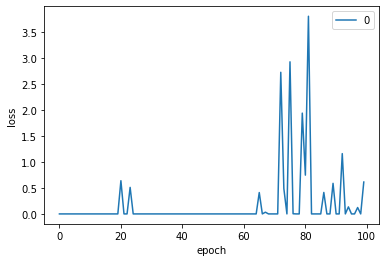

In [327]:
pd.DataFrame(hist.history["loss"]).plot()
plt.xlabel("epoch")
plt.ylabel("loss")

In [ ]:
class PlayingAi(Model):
    def __init__(model, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.model = model
        
        
    def compile()